In [168]:
%matplotlib inline
import pandas as pd
from glob import glob
from os import path
import re

In [4]:
def document_iterator(DIR):
    for file in glob(path.join(DIR, '*.txt')):
        yield open(file, 'r', encoding='cp1254').read()

In [153]:
def get_target(text):
    match = re.search(r'.{20}parcialmente.{20}', text, re.DOTALL | re.IGNORECASE)
    if match:
        return match.group()

In [172]:
def get_target(text):
    procedente_positions = [m.start() for m in re.finditer(' procedente', text, re.IGNORECASE)]
    improcedente_positions = [m.start() for m in re.finditer('improcedente', text, re.IGNORECASE)]
    if len(improcedente_positions) > 0 and len(procedente_positions) == 0: 
        return 1
    
    elif len(improcedente_positions) == 0 and len(procedente_positions) > 0: 
        return 0
    
    elif len(improcedente_positions) > 0 and len(procedente_positions) > 0:
        return int(improcedente_positions[-1] > procedente_positions[-1])
    else:
        return 0

In [133]:
s = "BATATAaiushaisuaaiushaiuasniuashBATATA"

In [150]:
m = re.search(r'.*(BA)(TA)TA.*', s)

In [152]:
m.group(1)

'BA'

In [21]:
files = glob(path.join('../data/', '*.txt'))

In [34]:
def open_file(file):
    return open(file, 'r', encoding='cp1254').read()

In [181]:
#targets = [get_target(open_file(f)) for f in files[:20000]]

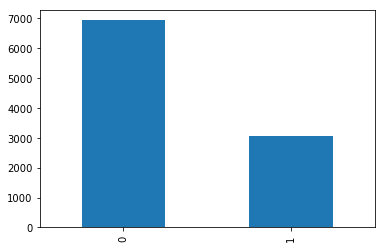

In [179]:
pd.Series(targets).value_counts().plot(kind='bar')